<a href="https://colab.research.google.com/github/percivalyan/peramalan-harga-beras-fuzzy/blob/main/PeramalanHargaBerasFuzzy_DataLangsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt\

# Contoh data: Periode, Tahun, Bulan, Harga
data = {
    'Periode': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Tahun': [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
    'Bulan': ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt'],
    'Harga': [5000, 5100, 5200, 5300, 5250, 5400, 5500, 5450, 5600, 5700]
}

# Konversi data ke DataFrame
df = pd.DataFrame(data)

In [ ]:
# 1. Penentuan Nilai Maksimum dan Minimum Data
harga_max = df['Harga'].max()
harga_min = df['Harga'].min()
print(f"Nilai Maksimum Harga: {harga_max}")
print(f"Nilai Minimum Harga: {harga_min}")

Nilai Maksimum Harga: 5700
Nilai Minimum Harga: 5000


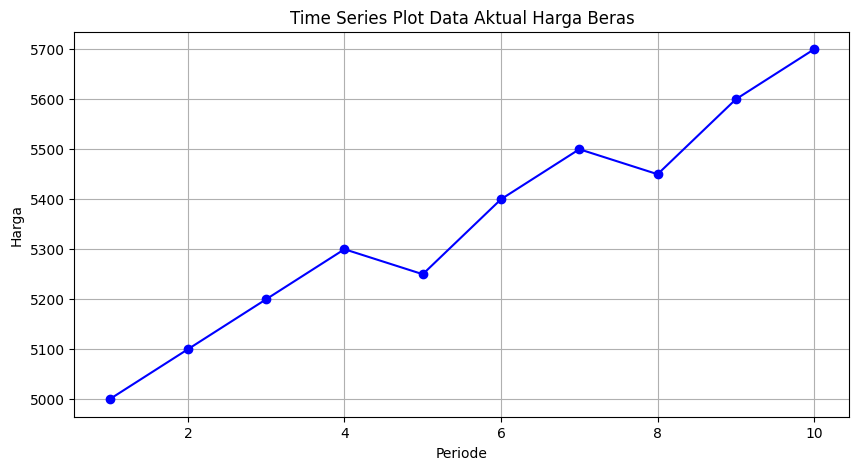

In [ ]:
# 2. Time Series Plot Data Aktual
plt.figure(figsize=(10,5))
plt.plot(df['Periode'], df['Harga'], marker='o', linestyle='-', color='b')
plt.title('Time Series Plot Data Aktual Harga Beras')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.grid(True)
plt.show()

In [ ]:
# 3. Penentuan Semesta Pembicaraan U
U_max = harga_max + (0.1 * harga_max)
U_min = harga_min - (0.1 * harga_min)
print(f"Semesta Pembicaraan U: [{U_min}, {U_max}]")

Semesta Pembicaraan U: [4500.0, 6270.0]


In [ ]:
# 4. Menghitung Panjang Interval
num_intervals = 7  # Contoh jumlah interval
interval_length = (U_max - U_min) / num_intervals
print(f"Panjang Interval: {interval_length}")

Panjang Interval: 252.85714285714286


In [ ]:
# 5. Rata-Rata Selisih Absolut
mean_abs_diff = df['Harga'].diff().abs().mean()
print(f"Rata-Rata Selisih Absolut: {mean_abs_diff}")

Rata-Rata Selisih Absolut: 100.0


In [ ]:
# 6. Menghitung Basis Interval
intervals = [U_min + i * interval_length for i in range(num_intervals + 1)]
print(f"Basis Interval: {intervals}")

Basis Interval: [4500.0, 4752.857142857143, 5005.714285714285, 5258.571428571428, 5511.428571428572, 5764.285714285714, 6017.142857142857, 6270.0]


In [ ]:
# 7. Menghitung Banyaknya Himpunan Fuzzy
num_fuzzy_sets = num_intervals
print(f"Banyaknya Himpunan Fuzzy: {num_fuzzy_sets}")

Banyaknya Himpunan Fuzzy: 7


In [ ]:
# 8. Menentukan Nilai Tengah Himpunan Fuzzy
fuzzy_centers = [(intervals[i] + intervals[i + 1]) / 2 for i in range(num_intervals)]
print(f"Nilai Tengah Himpunan Fuzzy: {fuzzy_centers}")

Nilai Tengah Himpunan Fuzzy: [4626.428571428572, 4879.285714285714, 5132.142857142857, 5385.0, 5637.857142857143, 5890.714285714285, 6143.571428571428]


In [ ]:
# 9. Mendefinisikan Derajat Keanggotaan Himpunan Fuzzy
def fuzzy_membership(x, centers, length):
    memberships = []
    for c in centers:
        membership = max(1 - abs(x - c) / length, 0)
        memberships.append(membership)
    return memberships

# 10. Fuzzyfikasi Data
df['Fuzzy'] = df['Harga'].apply(lambda x: fuzzy_membership(x, fuzzy_centers, interval_length))
print("Data Fuzzyfikasi:")
print(df[['Harga', 'Fuzzy']])

Data Fuzzyfikasi:
   Harga                                              Fuzzy
0   5000  [0, 0.5225988700564952, 0.4774011299435038, 0,...
1   5100  [0, 0.1271186440677946, 0.8728813559322044, 0,...
2   5200  [0, 0, 0.731638418079095, 0.268361581920904, 0...
3   5300  [0, 0, 0.33615819209039444, 0.6638418079096045...
4   5250  [0, 0, 0.5338983050847448, 0.4661016949152542,...
5   5400  [0, 0, 0, 0.940677966101695, 0.059322033898304...
6   5500  [0, 0, 0, 0.5451977401129944, 0.45480225988700...
7   5450  [0, 0, 0, 0.7429378531073446, 0.25706214689265...
8   5600  [0, 0, 0, 0.1497175141242938, 0.85028248587570...
9   5700  [0, 0, 0, 0, 0.7542372881355943, 0.24576271186...


In [ ]:
# 11. Fuzzy Logical Relationship Orde 1
flr = []
for i in range(len(df) - 1):
    current_state = np.argmax(df['Fuzzy'].iloc[i])
    next_state = np.argmax(df['Fuzzy'].iloc[i + 1])
    flr.append((current_state, next_state))
print(f"Fuzzy Logical Relationship Orde 1: {flr}")

Fuzzy Logical Relationship Orde 1: [(1, 2), (2, 2), (2, 3), (3, 2), (2, 3), (3, 3), (3, 3), (3, 4), (4, 4)]


In [ ]:
# 12. Fuzzy Logical Relationship Group Orde 1
flrg = {}
for i, (cur, next_) in enumerate(flr):
    if cur in flrg:
        flrg[cur].append(next_)
    else:
        flrg[cur] = [next_]
print(f"Fuzzy Logical Relationship Group Orde 1: {flrg}")

Fuzzy Logical Relationship Group Orde 1: {1: [2], 2: [2, 3, 3], 3: [2, 3, 3, 4], 4: [4]}


In [ ]:
# 13. Defuzzyfikasi FLRG Orde 1
def defuzzify(flrg, centers):
    defuzzified = {}
    for key, values in flrg.items():
        defuzzified[key] = np.mean([centers[v] for v in values])
    return defuzzified

defuzzified_values = defuzzify(flrg, fuzzy_centers)
print(f"Defuzzyfikasi FLRG Orde 1: {defuzzified_values}")

Defuzzyfikasi FLRG Orde 1: {1: 5132.142857142857, 2: 5300.714285714285, 3: 5385.0, 4: 5637.857142857143}


In [ ]:
# 14. Defuzzyfikasi Nilai Peramalan Orde 1
forecasted_prices = []
for i in range(len(df) - 1):
    current_state = np.argmax(df['Fuzzy'].iloc[i])
    forecasted_price = defuzzified_values.get(current_state, np.mean(fuzzy_centers))
    forecasted_prices.append(forecasted_price)
forecasted_prices.insert(0, np.nan)  # Tambahkan nilai NaN untuk periode pertama karena tidak ada data sebelumnya
df['Forecast'] = forecasted_prices
print("Data dengan Hasil Peramalan:")
print(df[['Harga', 'Forecast']])

Data dengan Hasil Peramalan:
   Harga     Forecast
0   5000          NaN
1   5100  5132.142857
2   5200  5300.714286
3   5300  5300.714286
4   5250  5385.000000
5   5400  5300.714286
6   5500  5385.000000
7   5450  5385.000000
8   5600  5385.000000
9   5700  5637.857143


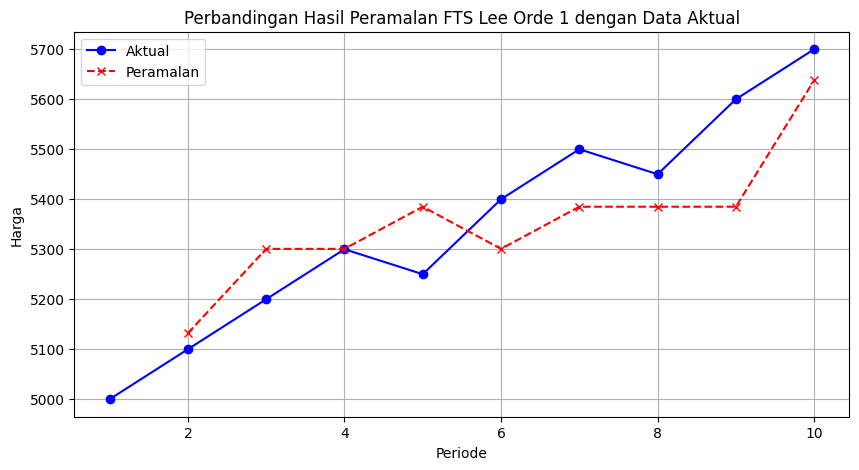

In [ ]:
# 15. Time Series Plot Perbandingan Hasil Peramalan FTS Lee Orde 1 dengan Data
plt.figure(figsize=(10,5))
plt.plot(df['Periode'], df['Harga'], marker='o', linestyle='-', color='b', label='Aktual')
plt.plot(df['Periode'], df['Forecast'], marker='x', linestyle='--', color='r', label='Peramalan')
plt.title('Perbandingan Hasil Peramalan FTS Lee Orde 1 dengan Data Aktual')
plt.xlabel('Periode')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 16. MAPE Hasil peramalan FTS Lee Orde 1
mape = np.mean(np.abs((df['Harga'][1:] - df['Forecast'][1:]) / df['Harga'][1:])) * 100
print(f"MAPE Hasil Peramalan FTS Lee Orde 1: {mape}%")

MAPE Hasil Peramalan FTS Lee Orde 1: 1.6892973562464997%
